# Autonomous Reforestation Robot (ML Model) for PDE4433_CW2

In [1]:
# Import libs
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text # this is used to show the DT Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/raw/Crop_Recommendation_new_dataframe.csv")
# https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset

print("Dataset size: ", df.shape)
df.head()

Dataset size:  (2200, 9)


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop,SoilType
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice,Sandy
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice,Sandy
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice,Loamy
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice,Loamy
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice,Loamy


array([[<Axes: title={'center': 'Nitrogen'}>,
        <Axes: title={'center': 'Phosphorus'}>,
        <Axes: title={'center': 'Potassium'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'pH_Value'}>],
       [<Axes: title={'center': 'Rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

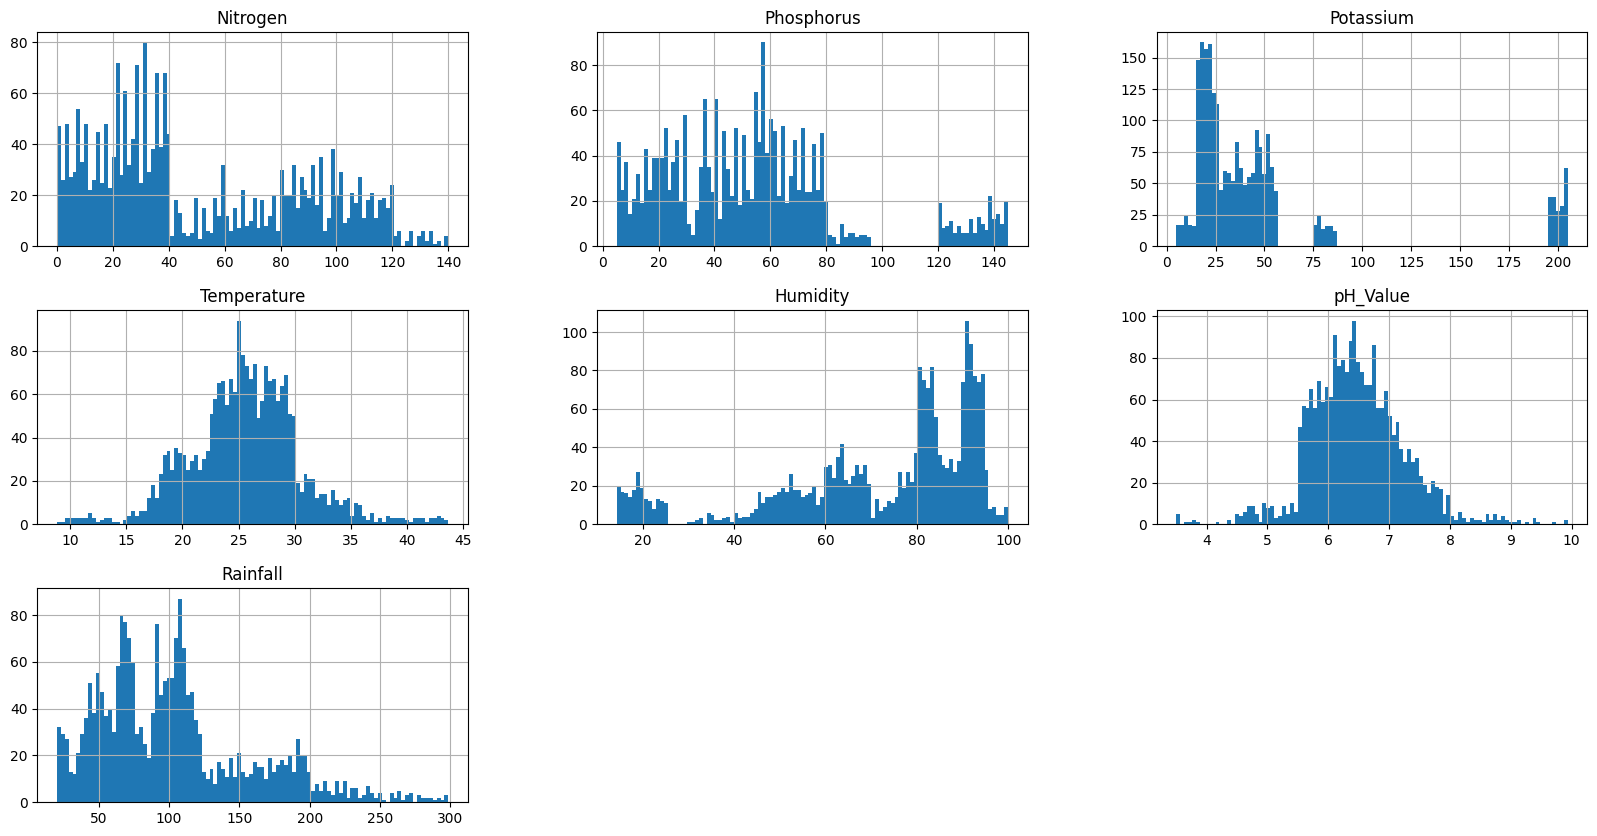

In [3]:
# Check data how scattaed
df.hist(bins=100, figsize=(20,10))

In [4]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
SoilType       0
dtype: int64

No duplicates or null values. Able to continue.

In [6]:
# Check the columns
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'SoilType'],
      dtype='object')

## <u>Model Training Start</u>

### <u>First model will be Decison Tree</u>

In [7]:
print(df.columns)

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop', 'SoilType'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['SoilType'] = le.fit_transform(df['SoilType'])

x1_feature = ['Nitrogen','Phosphorus','Potassium','Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'SoilType']
y1_feature = ['Crop']

print(x1_feature)
print(y1_feature)

x1 = df.loc[:, x1_feature].values
y1 = df.loc[:, y1_feature].values

print("X1 Shape: " , x1.shape)
print("Y1 Shape: " , y1.shape)

['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall', 'SoilType']
['Crop']
X1 Shape:  (2200, 8)
Y1 Shape:  (2200, 1)


In [9]:
# Split data into train and test. trainin size decided to be 70% of data 
X_train, X_test, Y_train, Y_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

print("X_train shape : " , X_train.shape)
print("X_test shape : " , X_test.shape)
print("Y_train shape : " , Y_train.shape)
print("Y_test shape : " , Y_test.shape)

X_train shape :  (1540, 8)
X_test shape :  (660, 8)
Y_train shape :  (1540, 1)
Y_test shape :  (660, 1)


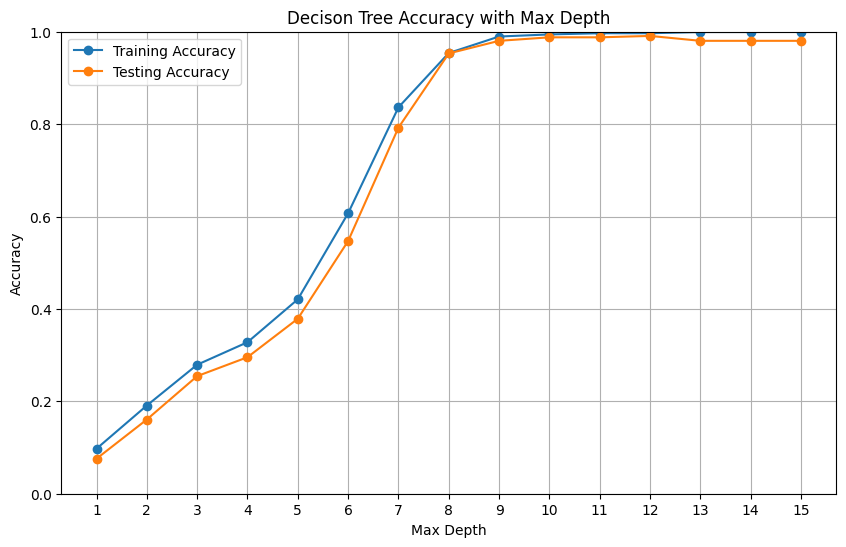

In [12]:
# Check the accuracy depend on the training cycles
train_accuracies = []
test_accuracies = []

min_depth_level = 1
max_depth_level = 16

for max_depth in range(min_depth_level, max_depth_level):
    decisionTree_model = DecisionTreeClassifier(max_depth=max_depth)
    decisionTree_model = decisionTree_model.fit(X_train, Y_train)
    
    train_accuracy = decisionTree_model.score(X_train, Y_train)
    test_accuracy = decisionTree_model.score(X_test, Y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(min_depth_level, max_depth_level), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(min_depth_level, max_depth_level), test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decison Tree Accuracy with Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(range(min_depth_level, max_depth_level))
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

In [13]:
# Model Training start
from sklearn.tree import DecisionTreeClassifier

decisionTree_model = DecisionTreeClassifier(max_depth=8)
decisionTree_model = decisionTree_model.fit(X_train, Y_train)

tree = export_text(decisionTree_model, feature_names = x1_feature )
print(tree)

|--- Phosphorus <= 107.50
|   |--- Humidity <= 27.98
|   |   |--- pH_Value <= 5.98
|   |   |   |--- class: KidneyBeans
|   |   |--- pH_Value >  5.98
|   |   |   |--- class: ChickPea
|   |--- Humidity >  27.98
|   |   |--- Rainfall <= 30.18
|   |   |   |--- class: Muskmelon
|   |   |--- Rainfall >  30.18
|   |   |   |--- Humidity <= 73.64
|   |   |   |   |--- Nitrogen <= 59.50
|   |   |   |   |   |--- Rainfall <= 82.08
|   |   |   |   |   |   |--- Rainfall <= 59.37
|   |   |   |   |   |   |   |--- Humidity <= 60.03
|   |   |   |   |   |   |   |   |--- class: MothBeans
|   |   |   |   |   |   |   |--- Humidity >  60.03
|   |   |   |   |   |   |   |   |--- class: Lentil
|   |   |   |   |   |   |--- Rainfall >  59.37
|   |   |   |   |   |   |   |--- Phosphorus <= 57.50
|   |   |   |   |   |   |   |   |--- class: MothBeans
|   |   |   |   |   |   |   |--- Phosphorus >  57.50
|   |   |   |   |   |   |   |   |--- class: Blackgram
|   |   |   |   |   |--- Rainfall >  82.08
|   |   |   |   |   

In [14]:
# Predict the output for the test dataset and print the accuracy of the predicted values

Y_pred = decisionTree_model.predict(X_test)

training_accuracy = decisionTree_model.score(X_train, Y_train)
print(f'Train Accuracy of the Decision tree model on the test set: {training_accuracy * 100:.2f}%')

dt_accuracy = metrics.accuracy_score(Y_test, Y_pred)
print(f'Test Accuracy of the Decision tree model on the test set: {dt_accuracy * 100:.2f}%')

Train Accuracy of the Decision tree model on the test set: 95.39%
Test Accuracy of the Decision tree model on the test set: 95.00%


In [125]:
# Save the model
import joblib
joblib.dump(decisionTree_model, '../models/Crop_RecommendationDT_decision_tree_model.pkl')

['../models/Crop_RecommendationDT_decision_tree_model.pkl']

### <u>Second model going to test is RandomForestClassifier</u>

C:\Users\HP BUSTAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP BUSTAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP BUSTAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP BUSTAN\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector 

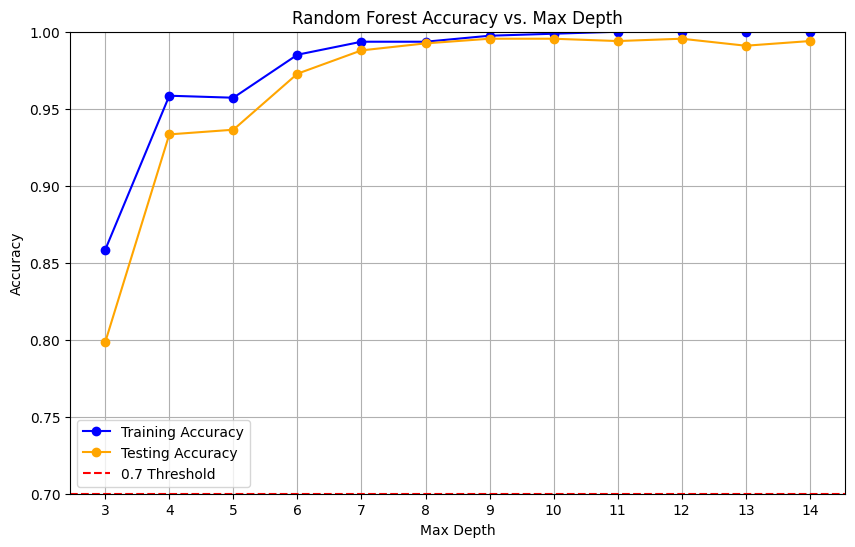

In [16]:
train_accuracies = []
test_accuracies = []

min_depth_level = 3
max_depth_level = 15

for max_depth in range(min_depth_level, max_depth_level):
    rf_Model = RandomForestClassifier(n_estimators=21, random_state=0, max_depth=max_depth)
    rf_Model.fit(X_train, Y_train)
    
    train_accuracy = rf_Model.score(X_train, Y_train)
    test_accuracy = rf_Model.score(X_test, Y_test)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Filter for accuracies greater than 0.7
filtered_depths = []
filtered_train_accuracies = []
filtered_test_accuracies = []

for depth, train_acc, test_acc in zip(range(min_depth_level, max_depth_level), train_accuracies, test_accuracies):
    if train_acc > 0.7 or test_acc > 0.7:
        filtered_depths.append(depth)
        filtered_train_accuracies.append(train_acc)
        filtered_test_accuracies.append(test_acc)

plt.figure(figsize=(10, 6))
plt.plot(filtered_depths, filtered_train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(filtered_depths, filtered_test_accuracies, label='Testing Accuracy', marker='o', linestyle='-', color='orange')

plt.title('Random Forest Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(filtered_depths)
plt.ylim(0.7, 1)  # Set y-axis limits to focus on accuracies above 0.7
plt.axhline(y=0.7, color='red', linestyle='--', label='0.7 Threshold')  # Add a horizontal line at y=0.7
plt.legend()
plt.grid()
plt.show()

In [17]:
# Create a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

# Model initializing
rf_Model = RandomForestClassifier(n_estimators=21, random_state=0, max_depth=8)

# Fit the model with data
rf_Model = rf_Model.fit(X_train, Y_train)

# # Print prediction
y_predict_rf = rf_Model.predict(X_test)

training_accuracy = rf_Model.score(X_train, Y_train)
print(f'Train Accuracy of the Random Forest model on the test set: {training_accuracy * 100:.2f}%')

rf_accuracy = accuracy_score(Y_test, y_predict_rf)
print(f'Accuracy of the Random Forest model on the test set: {rf_accuracy * 100:.2f}%')

Train Accuracy of the Random Forest model on the test set: 99.35%
Accuracy of the Random Forest model on the test set: 99.24%


In [132]:
# Save model
import joblib
joblib.dump(rf_Model, '../models/Crop_RecommendationDT_random_forest_model.pkl')

['../models/Crop_RecommendationDT_random_forest_model.pkl']